# ME3


## A simple classification task with Naive Bayes classifier & ROC curve

### Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
%matplotlib notebook
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sn
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."

CHAPTER_ID = 'Naive Bayesian'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
#pip install -U scikit-learn

## Part 0:

Read and run each cell of the example. 

### Confusion matrix - simple example 1

A simple example shows what confusion matrix represents.
This example includes two class labels, 0 and 1. 

In [3]:
y_true1 = [1, 0, 0, 1, 1, 0, 1, 1, 0]
y_pred1 = [1, 1, 0, 1, 1, 0, 1, 1, 1]

confusion_mat1 = confusion_matrix(y_true1, y_pred1)
print(confusion_mat1)

[[2 2]
 [0 5]]


In [4]:
# Print classification report
target_names1 = ['Class-0', 'Class-1']

result_metrics1 = classification_report(y_true1, y_pred1, target_names=target_names1)
print(result_metrics1)

# We can also retrieve a dictionary of metrics and access the values using dictionary
result_metrics_dict1 = classification_report(y_true1, y_pred1, target_names=target_names1, output_dict=True)
print(result_metrics_dict1)

              precision    recall  f1-score   support

     Class-0       1.00      0.50      0.67         4
     Class-1       0.71      1.00      0.83         5

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9

{'Class-0': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 4}, 'Class-1': {'precision': 0.7142857142857143, 'recall': 1.0, 'f1-score': 0.8333333333333333, 'support': 5}, 'accuracy': 0.7777777777777778, 'macro avg': {'precision': 0.8571428571428572, 'recall': 0.75, 'f1-score': 0.75, 'support': 9}, 'weighted avg': {'precision': 0.8412698412698413, 'recall': 0.7777777777777778, 'f1-score': 0.7592592592592591, 'support': 9}}


### Confusion matrix - simple example 2

A simple example shows what confusion matrix represents. 

This example includes four class labels, 0, 1, 2 and 3. 

In [5]:
y_true2 = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred2 = [1, 1, 0, 2, 1, 0, 1, 3, 3]

confusion_mat2 = confusion_matrix(y_true2, y_pred2)
print(confusion_mat2)

[[2 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 2]]


In [6]:
target_names2 = ['Class-0', 'Class-1', 'Class-2', 'Class-3']

result_metrics2 = classification_report(y_true2, y_pred2, target_names=target_names2)
print(result_metrics2)


# We can also retrieve a dictionary of metrics and access the values using dictionary
result_metrics_dict2 = classification_report(y_true2, y_pred2, target_names=target_names2, output_dict=True)
print(result_metrics_dict2)

              precision    recall  f1-score   support

     Class-0       1.00      0.67      0.80         3
     Class-1       0.50      1.00      0.67         2
     Class-2       1.00      1.00      1.00         1
     Class-3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9

{'Class-0': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 3}, 'Class-1': {'precision': 0.5, 'recall': 1.0, 'f1-score': 0.6666666666666666, 'support': 2}, 'Class-2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'Class-3': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 3}, 'accuracy': 0.7777777777777778, 'macro avg': {'precision': 0.875, 'recall': 0.8333333333333333, 'f1-score': 0.8166666666666667, 'support': 9}, 'weighted avg': {'precision': 0.8888888888888888, 'recall': 0.777777

## Naive Bayes Classifiers

- Read Naive Bayes classifier in Python:
https://scikit-learn.org/stable/modules/naive_bayes.html

- Check out the difference between model parameters and hyper parameters:
https://towardsdatascience.com/model-parameters-and-hyperparameters-in-machine-learning-what-is-the-difference-702d30970f6

### 1. Sythetic Datasets

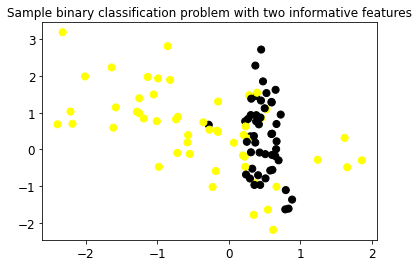

In [7]:
# synthetic dataset for classification (binary)

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

plt.figure()
plt.title('Sample binary classification problem with two informative features')

# generate X values and y values (labels)
X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

# plot the data
plt.scatter(X[:, 0], X[:, 1], marker= 'o', c=y, s=50, cmap=cmap_bold)
plt.show()

###  Naive Bayes classifier 1

#### Split the data to training data and test data

In [8]:
from sklearn.naive_bayes import GaussianNB

# split the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Training: Develop a model using training data

In [9]:
# create a Naive Bayes classifier using the training data
nbclf = GaussianNB()
nbclf.fit(X_train, y_train)

GaussianNB()

#### Testing: evaluate the model using testing data

In [10]:
# predict class labels on test data
y_pred = nbclf.predict(X_test)

#### Model Evaluation

In [11]:
# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

# Print classification report
target_names = ['Class 0', 'Class 1']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)
print(result_metrics)

[[12  3]
 [ 1  9]]
              precision    recall  f1-score   support

     Class 0       0.92      0.80      0.86        15
     Class 1       0.75      0.90      0.82        10

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25



In [12]:
# The average accuracy of the model on test data. This is the value of macro avg in results
nbclf.score(X_test, y_test)

0.84

In [29]:
from adspy_shared_utilities import plot_class_regions_for_classifier

# This shows the boundaries of classified regions
# build a NB model using training data and display the classified region 
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

ModuleNotFoundError: No module named 'graphviz'

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc
y_score = nbclf.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)

print('Accuracy = ', roc_auc)

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 2. Application to a real-world dataset

- Breast Cancer dataset: one of the well-known datasets used in ML. 


In [ ]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

print(X_cancer)

In [ ]:
# Print class labels
target_names = cancer.target_names
target_names

#### Modeling through k-Cross Validation

- Create 10 folds for training and testing.
- Evaluate model performance for each iteration and obtain the average. 

In [ ]:
from sklearn.model_selection import KFold 

# We start with k=3 and will increase it to 10.
kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 10 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print (kf)

#### Apply k-Cross Validation

In [ ]:
nbclf = GaussianNB()

for train_index, test_index in kf.split(X_cancer):
    # for each iteration, get training data and test data
    X_train, X_test = X_cancer[train_index], X_cancer[test_index]
    y_train, y_test = y_cancer[train_index], y_cancer[test_index]

    # train the model using training data
    nbclf.fit(X_train, y_train)
    
    # show how model performs with training data and test data
    print('Accuracy of GaussianNB classifier on training set: {:.2f}'
         .format(nbclf.score(X_train, y_train)))

    print('Accuracy of GaussianNB classifier on test set: {:.2f}'
         .format(nbclf.score(X_test, y_test)))

#### Model performance uisng k-Cross Validation

In [ ]:
nbclf2 = GaussianNB()

# !!!!! Please make a summary of the model performance (averaging k folds' results) using result_metrics_dict 
for train_index, test_index in kf.split(X_cancer):
    # for each iteration, get training data and test data
    X_train, X_test = X_cancer[train_index], X_cancer[test_index]
    y_train, y_test = y_cancer[train_index], y_cancer[test_index]

    # train the model using training data
    nbclf2.fit(X_train, y_train)
    
    # predict y values using test data
    y_pred = nbclf2.predict(X_test)

    confusion_mat = confusion_matrix(y_test, y_pred)
    print(confusion_mat)
    
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    # Since we can retrieve a dictionary of metrics and access the values using dictionary,
    # now we can sum of the results of each iteration and get the average
    result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    print(result_metrics_dict)

### ROC Curve

The example shows a ROC curve using training data and test data for one time. This can be done in k-Cross Validation.

In [ ]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

y_score = nbclf2.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)
print('Accuracy = ', roc_auc)

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ME3 Part 1

#### Build Naive Bayes classifiers on a well-known dataset, iris dataset. 

You are asked to build NB classifiers on two different datasets: (1) the original dataset (the data is not normalized) and (2) the normalized dataset. Use k-cross validation to evaluate the model performance. 

In [ ]:
from IPython.display import Image

Image("images/iris.png")

### Dataset 1: iris

Obtain the data through either (1) or (2). 

- (1) You can read the data from sklearn.datasets using load_iris()
- (2) you can directly read the data from a local file: iris.csv is stored in a folder "data"

Run one of the two. 

#### (1) Obtain the data from sklearn.datsets

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data # petal length and width
y = iris.target
print(iris.target_names)
print(X)
print(y)

#### (2) Read the data from a local file: iris.csv is stored in a folder "data"

In [14]:
# read data from CSV file to dataframe
iris = pd.read_csv('./data/iris.csv')

# define target_namees (class lables)
target_names = ['setosa', 'versicolor', 'virginica']

print(iris.head())
print(iris.tail())

# X contains the first four columns, y contains class labels
#X = iris_data.iloc[:, [0,1,2,3]]
X = iris.drop(['Name', 'Class'], axis=1)
y = iris.iloc[:, [5]]
print(X.head())
print(y.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth         Name  Class
0          5.1         3.5          1.4         0.2  Iris-setosa      0
1          4.9         3.0          1.4         0.2  Iris-setosa      0
2          4.7         3.2          1.3         0.2  Iris-setosa      0
3          4.6         3.1          1.5         0.2  Iris-setosa      0
4          5.0         3.6          1.4         0.2  Iris-setosa      0
     SepalLength  SepalWidth  PetalLength  PetalWidth            Name  Class
145          6.7         3.0          5.2         2.3  Iris-virginica      2
146          6.3         2.5          5.0         1.9  Iris-virginica      2
147          6.5         3.0          5.2         2.0  Iris-virginica      2
148          6.2         3.4          5.4         2.3  Iris-virginica      2
149          5.9         3.0          5.1         1.8  Iris-virginica      2
   SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1 

### Tasks:

- First, run basic Python functions for checking the data.

    - describe(), info(), isnull(), boxplot(), etc. 

- Your modeling analysis should be done on two different datasets, (1) the original dataset and (2) 

In [21]:
# checking 5 number summary
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [22]:
# check for null attributes
print(iris.isnull().sum())

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
Class          0
dtype: int64


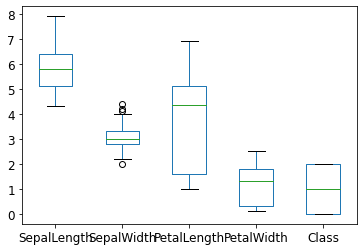

In [23]:
iris.plot.box();

(1) NB classifier using the original dataset

- Create Naive Bayes classifier. 

- A framework of k-cross validation (k = 3).

- Display confusion matrix (a matrix with numbers).

- Print a summary of performance metrics.

- Plot ROC curves (this task is done. See the example code segment). 

In [24]:
from sklearn.model_selection import train_test_split
# numpy.ravel() functions returns contiguous flattened array
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=0.3)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Create Naive Bayes classifier
nbclf = GaussianNB().fit(X_train, y_train)

# cross_val_score function will fit the model and predict on the kfolds giving you an accuracy score for each fold.
cross_val_score(nbclf, X_train, y_train, cv = 3, scoring='accuracy')


array([0.97142857, 0.85714286, 0.94285714])

In [26]:
# predict the class labels for test data
y_pred = nbclf.predict(X_test)

# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [27]:
# Print a summary of performance metrics.
result_metrics = classification_report(y_test, y_pred, target_names = target_names)
print(result_metrics)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



#### ROC Curve

- This part is done. This code assumes that your NB classifier is defined as nbclf. 

- The code segment shows how to draw ROC curves for multi-classification where there are more than two class labels. 

accuracy:  1.0


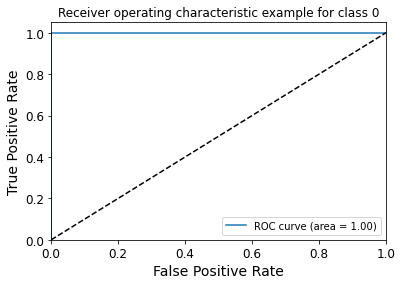

accuracy:  1.0


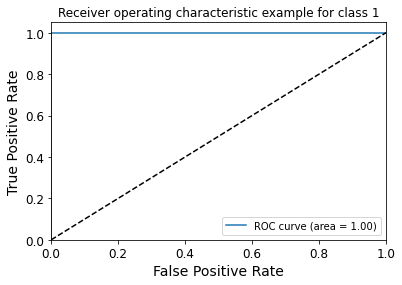

accuracy:  1.0


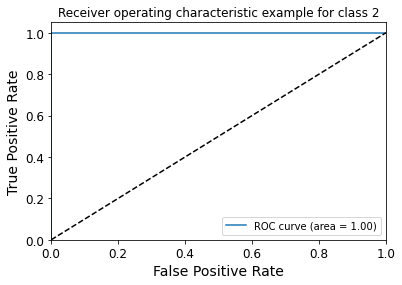

In [28]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# we assume that your NB classifier's name is nbclf.
# Otherwise, you need to modify the name of the model. 
y_score = nbclf.predict_proba(X_test)
y_test = label_binarize(y_test, classes=[0,1,2])
n_classes = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    print("accuracy: " , roc_auc[i])
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example for class ' + str(i) )
    plt.legend(loc="lower right")
    plt.show()

(2) NB classifier using the normalized dataset

- Normalize the data - Make sure that you normalized only X values. 

- Create Naive Bayes classifier. 

- A framework of k-cross validation (k = 3).

- Display confusion matrix (a matrix with numbers).

- Print a summary of performance metrics.

- Plot ROC curves (this task is done. See the example code segment). 

In [36]:
# normalize X values
X_norm = (X-X.min())/ (X.max() - X.min())
X_train, X_test, y_train, y_test = train_test_split(X_norm, np.ravel(y), test_size=0.3)

In [37]:
# Create Naive Bayes classifier
nbclf = GaussianNB().fit(X_train, y_train)

# cross_val_score function will fit the model and predict on the kfolds giving you an accuracy score for each fold.
cross_val_score(nbclf, X_train, y_train, cv = 3, scoring='accuracy')

array([0.91428571, 0.97142857, 0.88571429])

In [39]:
y_pred = nbclf.predict(X_test)
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[18  0  0]
 [ 0 11  1]
 [ 0  0 15]]


In [40]:
# Print a summary of performance metrics.
result_metrics = classification_report(y_test, y_pred, target_names = target_names)
print(result_metrics)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.92      0.96        12
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



accuracy:  0.5


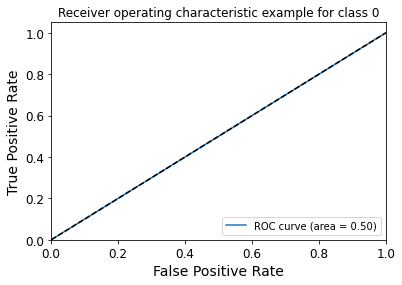

accuracy:  0.23011363636363635


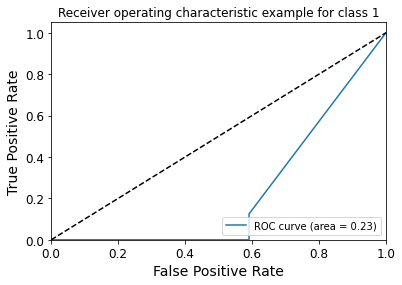

accuracy:  0.5


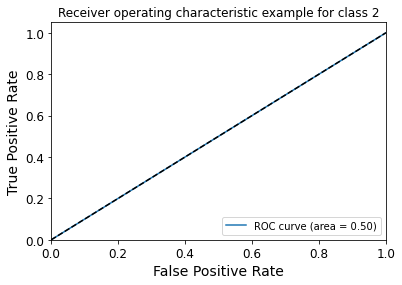

In [41]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# we assume that your NB classifier's name is nbclf.
# Otherwise, you need to modify the name of the model. 
y_score = nbclf.predict_proba(X_test)
y_test = label_binarize(y_test, classes=[0,1,2])
n_classes = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    print("accuracy: " , roc_auc[i])
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example for class ' + str(i) )
    plt.legend(loc="lower right")
    plt.show()

### Part 2 Summary

- Upload your notebook on GitHub repo and provide an URL to the file.

- Write a summary of the analysis and submit it to Canvas. Your summary should include the comparisons of the two models in terms of their performance. 

In [ ]:
"""
Before the X values are normalized, the ROC curve shows that the true positive rate of 
the model is higher than the false positive rate and the curve is higher than the diagonal line. After the X values are normalized, the ROC curve shows that the ROC curve is matching or close to match the 
diagonal line. The further the curve is to the diagonal line, the better the model is at discriminating between positives and negatives.
When X values are normalized, the ROC curve shows that the model performance has decreases because the curve is very close to the diagonal line. 
The model before the normalization shows that the curve is very far from the ROC curve so this model performance is better than the normalized one.
"""